In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns #Another library for visualization
np.set_printoptions(suppress=True)
sns.set_style("ticks") #to see seaborn inline in notebook
%matplotlib inline #to see matplotlib inline in notebook
plt.style.use("seaborn-poster")  # make bigger plots

UsageError: unrecognized arguments: #to see matplotlib inline in notebook


In [15]:
df=pd.read_csv("housing_prices.csv")
df.head(10)

,AREA,FLOOR,ROOM,CODE,PRICE
0,1000,7,2,B,5618
1,1030,7,1,A,5201
2,1060,1,1,A,4779
3,1090,6,1,A,5425
4,1120,0,2,B,5657
5,1150,1,1,B,4945
6,1180,6,2,B,6475
7,1210,0,1,A,5352
8,1240,0,2,B,6290
9,1270,7,1,A,6147


In [16]:
x=df.iloc[:,:-2].values # Code and target(price)
y=df.iloc[:,-1].values

In [4]:
# Not Needed
x=x[:,:-1] # code column can be removed (Trainer making example easy)

In [17]:
x

array([[1000,    7,    2],
       [1030,    7,    1],
       [1060,    1,    1],
       [1090,    6,    1],
       [1120,    0,    2],
       [1150,    1,    1],
       [1180,    6,    2],
       [1210,    0,    1],
       [1240,    0,    2],
       [1270,    7,    1],
       [1300,   10,    2],
       [1330,    3,    2],
       [1360,    3,    3],
       [1390,    8,    3],
       [1420,    3,    2],
       [1450,    7,    2],
       [1480,    8,    3],
       [1510,    7,    2],
       [1540,    6,    3],
       [1570,    8,    3],
       [1600,    6,    2],
       [1630,    4,    3],
       [1660,    1,    3],
       [1690,    3,    3],
       [1720,    3,    3],
       [1750,    0,    2],
       [1780,    4,    2],
       [1810,    1,    3],
       [1840,    6,    2],
       [1870,    6,    3],
       [1900,    8,    2],
       [1930,    8,    2],
       [1960,    0,    2],
       [1990,    8,    2],
       [2020,    0,    4],
       [2050,   10,    3],
       [2080,    9,    5],
 

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Train of x: ",x_train.shape) # x is always 2d so that (40,1)
print("Train of y:",y_train.shape) # y is always 1d so that (40,)
print("Test of x:",x_test.shape)
print('Test of y:',y_test.shape)

Train of x:  (40, 2)
Train of y: (40,)
Test of x: (10, 2)
Test of y: (10,)


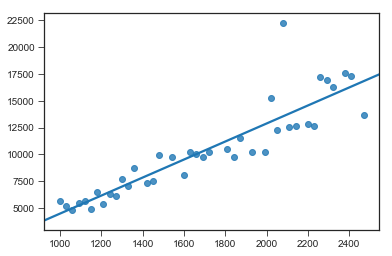

In [7]:
sns.regplot(x_train[:,0],y_train,order=1,ci=0)

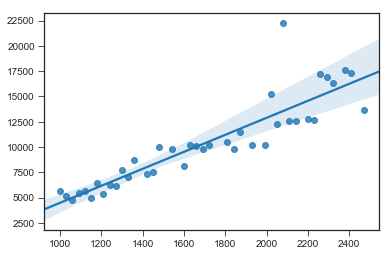

In [8]:
sns.regplot(x_train[:,0],y_train,order=1,ci=100) # ci = 100 use to get shade around the regression line

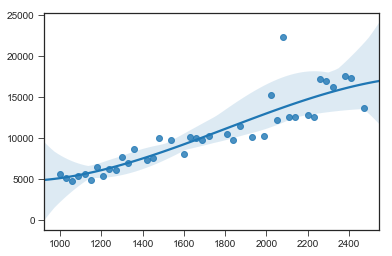

In [9]:
sns.regplot(x_train[:,0],y_train,order=3,ci=100) # order increases, no. changes in the curve increases

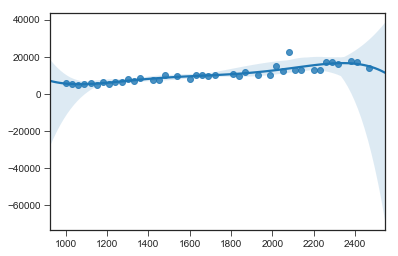

In [10]:
sns.regplot(x_train[:,0],y_train,order=5,ci=100)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x_train[:,0:1])

In [12]:
print(x_poly[:10])

[[      1.    1360. 1849600.]
 [      1.    1120. 1254400.]
 [      1.    2110. 4452100.]
 [      1.    1240. 1537600.]
 [      1.    1090. 1188100.]
 [      1.    1180. 1392400.]
 [      1.    2230. 4972900.]
 [      1.    2380. 5664400.]
 [      1.    2410. 5808100.]
 [      1.    1450. 2102500.]]


In [13]:
from sklearn.linear_model import LinearRegression
reg_poly=LinearRegression()
reg_poly.fit(x_poly[:,2:],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)